In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [54]:
df = pd.read_csv("final_internship_data.csv")
df.head(500000)


KeyboardInterrupt: 

In [ ]:
df.head(150000).to_csv('sample_100k.csv', index=False)

In [ ]:
df.head(85000).to_csv('sample_85k.csv', index=False)

In [ ]:
df["hour"]

0         17
1         16
2          0
3          4
4          7
          ..
499995    18
499996    12
499997     0
499998    12
499999    23
Name: hour, Length: 500000, dtype: int64

preprocessing

In [ ]:
df.shape

(500000, 26)

In [ ]:
df.isna().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            499995 non-null  object 
 1   User Name          499995 non-null  object 
 2   Driver Name        499995 non-null  object 
 3   Car Condition      499995 non-null  object 
 4   Weather            499995 non-null  object 
 5   Traffic Condition  499995 non-null  object 
 6   key                499995 non-null  object 
 7   fare_amount        499995 non-null  float64
 8   pickup_datetime    499995 non-null  object 
 9   pickup_longitude   499995 non-null  float64
 10  pickup_latitude    499995 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    499995 non-null  int64  
 14  hour               499995 non-null  int64  
 15  day                499995 non-null  int64  
 16  month  

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-1.265714,0.696742,-1.265755,0.696675,1.683445,13.510843,15.684239,6.268617,3.042020,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916069,0.206934,0.140906,0.205903,0.128997,1.307391,6.511596,8.681092,3.437798,1.949243,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Unique values: {unique_values}")
    print("-" * 50)

Column: User ID
Number of unique values: 499995
Unique values: ['KHVrEVlD' 'lPxIuEri' 'gsVN8JLS' ... 'QZIMcpLZ' 'AD72Uwmn' 'qGKn4Um5']
--------------------------------------------------
Column: User Name
Number of unique values: 221673
Unique values: ['Kimberly Adams' 'Justin Tapia' 'Elizabeth Lopez' ... 'Monique Wade'
 'Wanda Parks' 'Dillon Jackson']
--------------------------------------------------
Column: Driver Name
Number of unique values: 221700
Unique values: ['Amy Butler' 'Hannah Zimmerman' 'Amanda Jackson' ... 'Gabriel Coleman'
 'Larry Richards' 'Lonnie Santana']
--------------------------------------------------
Column: Car Condition
Number of unique values: 4
Unique values: ['Very Good' 'Excellent' 'Bad' 'Good']
--------------------------------------------------
Column: Weather
Number of unique values: 5
Unique values: ['windy' 'cloudy' 'stormy' 'sunny' 'rainy']
--------------------------------------------------
Column: Traffic Condition
Number of unique values: 3
Unique va

correlation matrix for dataset 

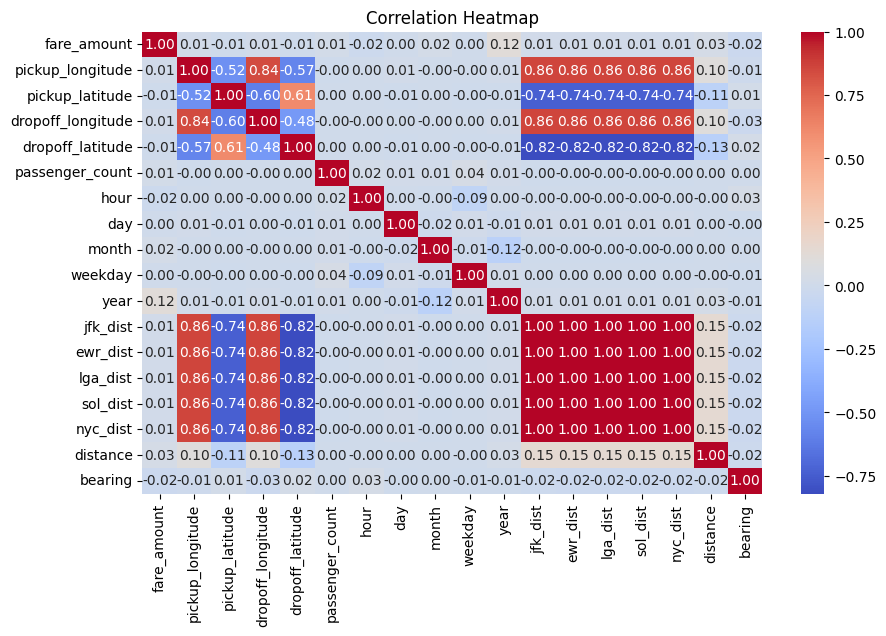

In [ ]:
numerical = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/1307044308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, palette='Set2', data=df, order=value_counts.index)


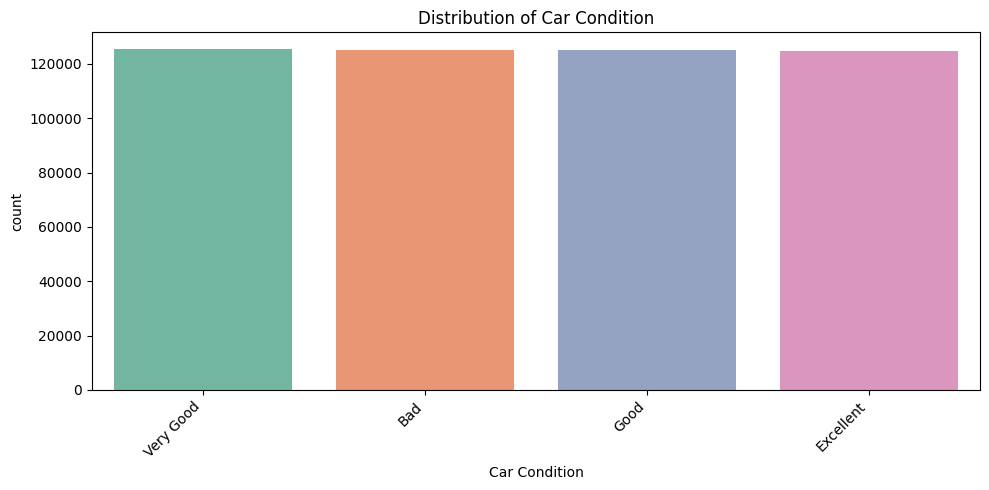

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/1307044308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, palette='Set2', data=df, order=value_counts.index)


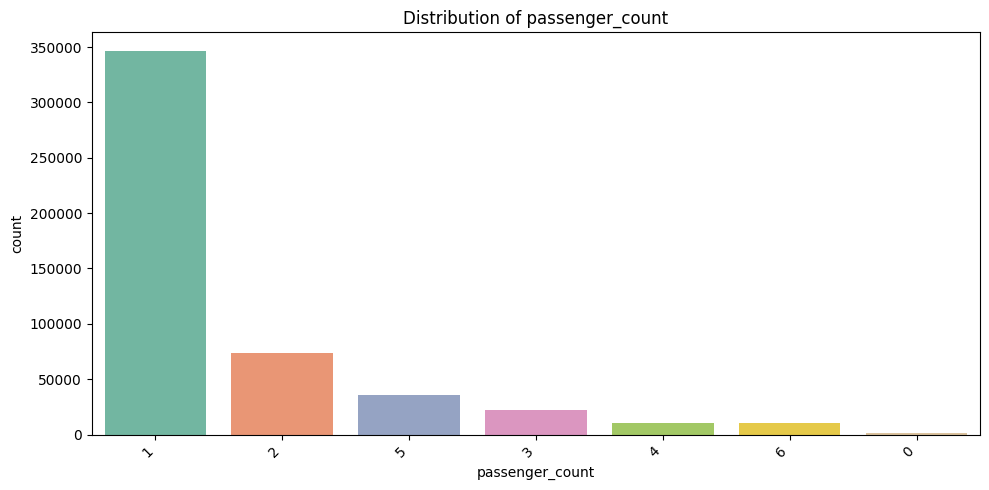

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/1307044308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, palette='Set2', data=df, order=value_counts.index)


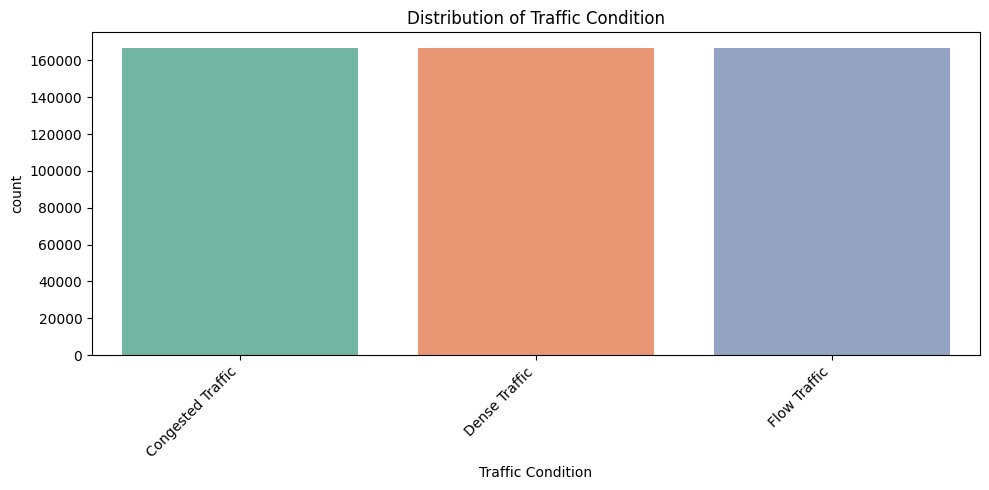

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/1307044308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, palette='Set2', data=df, order=value_counts.index)


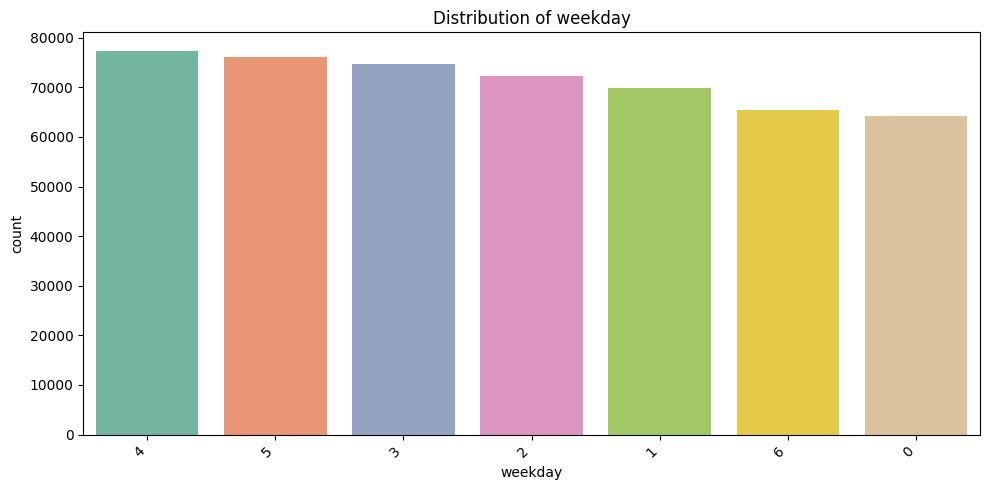

In [ ]:

categorical_columns = [ 'Car Condition', "passenger_count" , 'Traffic Condition', 'weekday']


for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    plt.gca().set_title(f'Distribution of {column}')
    
    
    value_counts = df[column].value_counts()
    
   
    if len(value_counts) > 15:
        top_values = value_counts.nlargest(15).index
        df_plot = df.copy()
        df_plot[column] = df_plot[column].apply(lambda x: x if x in top_values else 'Others')
        sns.countplot(x=column, palette='Set2', data=df_plot, order=df_plot[column].value_counts().index)
        plt.title(f'Distribution of {column} (Top 15 values)')
    else:
        sns.countplot(x=column, palette='Set2', data=df, order=value_counts.index)
    
  
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

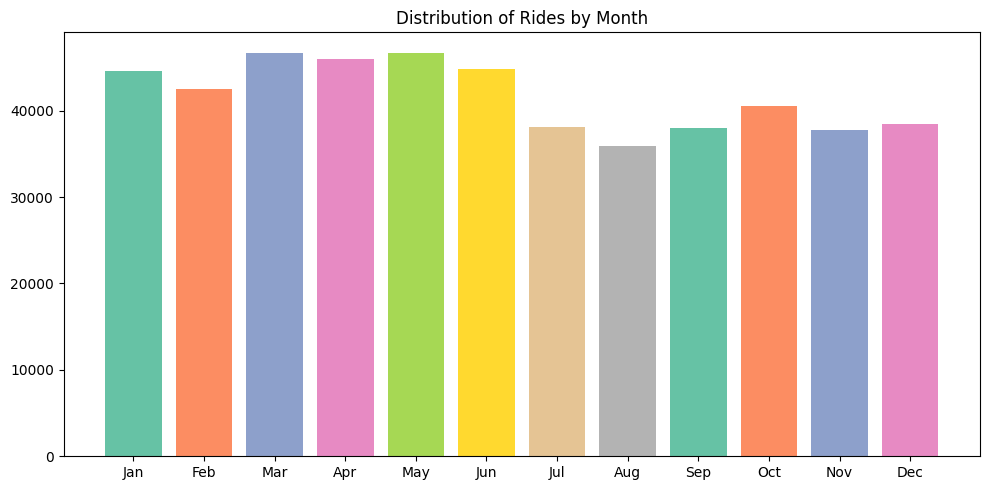

In [ ]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 5))
plt.gca().set_title('Distribution of Rides by Month')
month_counts = df['month'].value_counts().sort_index()
plt.bar(range(len(month_counts)), month_counts.values, color=sns.color_palette('Set2'))
plt.xticks(range(len(month_counts)), [month_names[i-1] for i in month_counts.index])
plt.tight_layout()
plt.show()


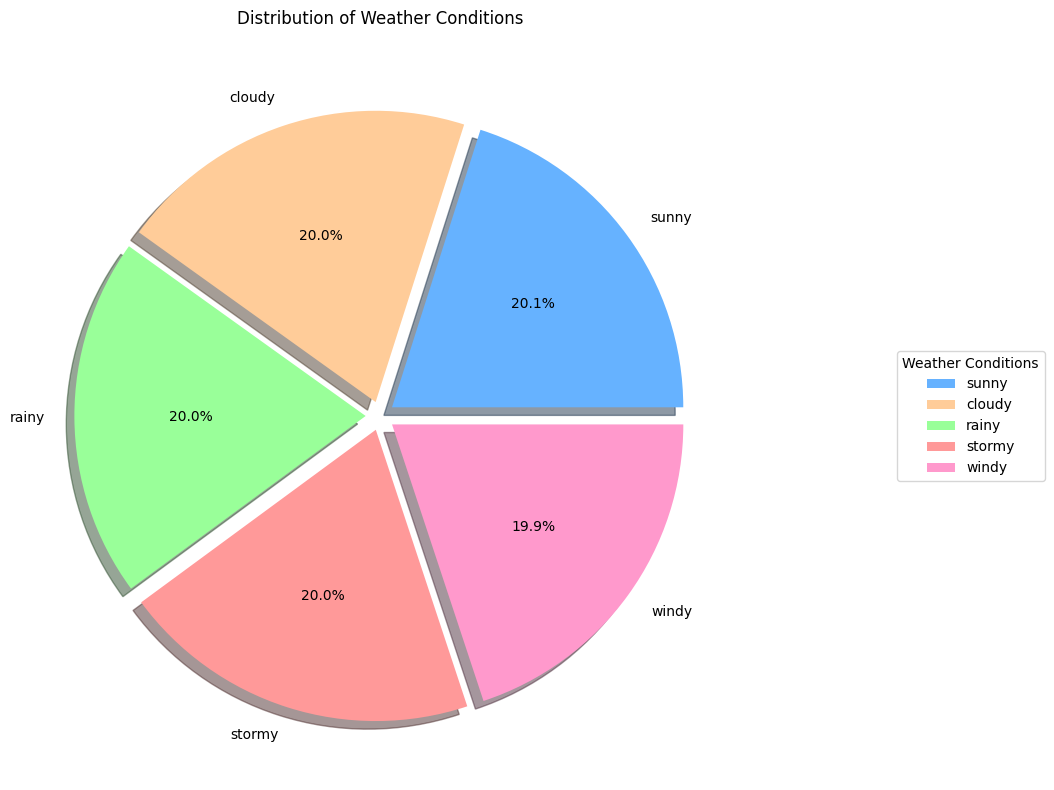

In [ ]:
# Get value counts for weather column
weather_distribution = df['Weather'].value_counts()

# Create the pie chart
plt.figure(figsize=(14, 8))
plt.pie(weather_distribution.values,
        labels=weather_distribution.index,
        autopct='%1.1f%%',
        colors=['#66B2FF', '#FFCC99', '#99FF99', '#FF9999', '#FF99CC'],
        explode=[0.05] * len(weather_distribution),
        shadow=True)

plt.title('Distribution of Weather Conditions', pad=20)
plt.legend(weather_distribution.index,
          title="Weather Conditions",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

plt.tight_layout()
plt.show()

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/3231303952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=df, palette='Set2')


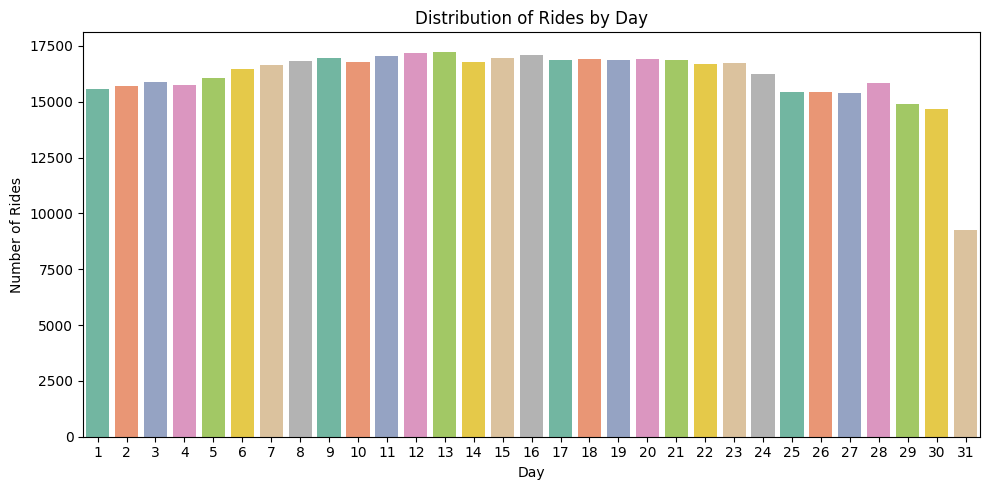

In [ ]:
plt.figure(figsize=(10, 5))
plt.gca().set_title('Distribution of Rides by Day')

# Create a count plot for the day column
sns.countplot(x='day', data=df, palette='Set2')

# Adjust labels
plt.xlabel('Day')
plt.ylabel('Number of Rides')

# Adjust ticks if there are many days
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

average distance according to place  

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/2246587155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_means.index, y=trip_means.values, palette="Blues_r")


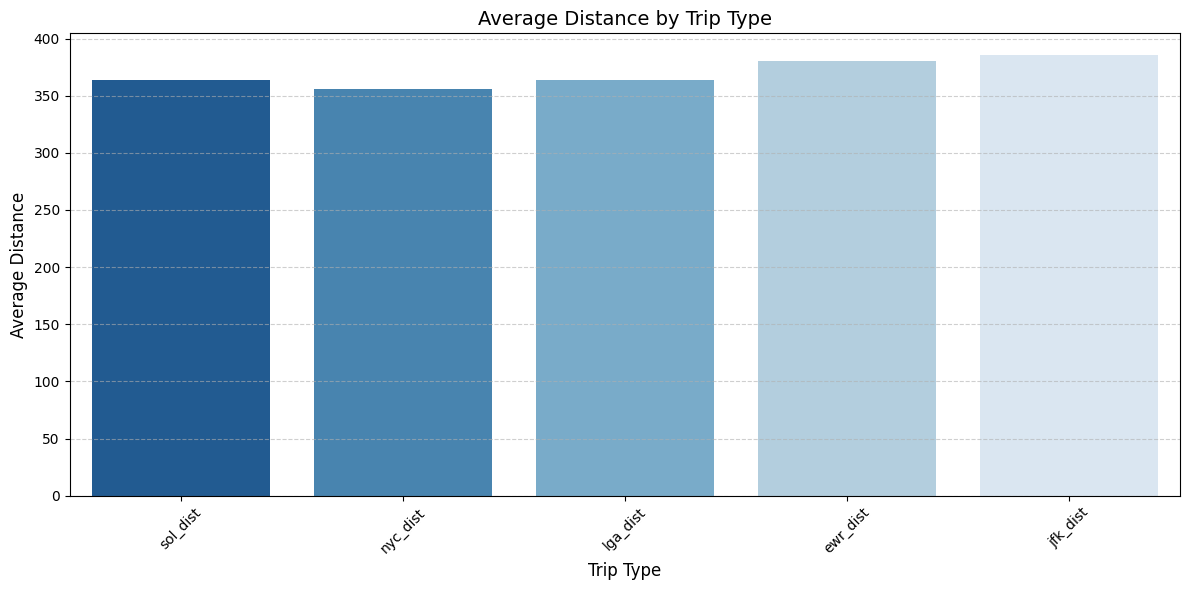

In [ ]:

trips_columns = ['sol_dist', 'nyc_dist', 'lga_dist', 'ewr_dist', 'jfk_dist']

trip_means = df[trips_columns].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=trip_means.index, y=trip_means.values, palette="Blues_r")

# Add labels and formatting
plt.title("Average Distance by Trip Type", fontsize=14)
plt.xlabel("Trip Type", fontsize=12)
plt.ylabel("Average Distance", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Fare according to the weather 

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/1128344127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_fare.index, y=weather_fare.values, palette="Greens_r")


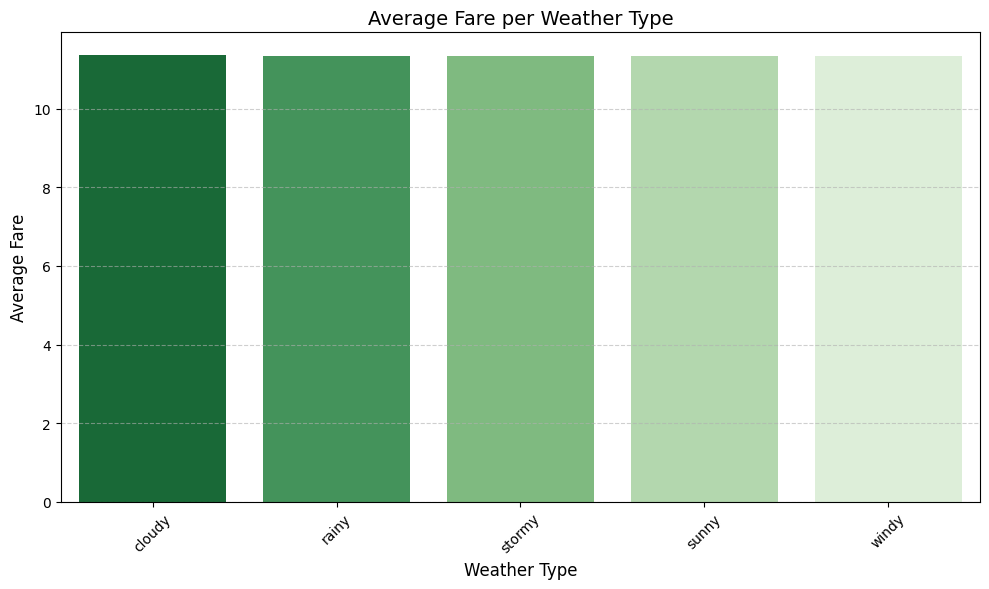

In [ ]:
weather_fare = df.groupby('Weather')['fare_amount'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_fare.index, y=weather_fare.values, palette="Greens_r")

# Add labels and formatting
plt.title("Average Fare per Weather Type", fontsize=14)
plt.xlabel("Weather Type", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Fare according to the car condition 

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/802273786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_fare.index, y=weather_fare.values, palette="Reds_r")


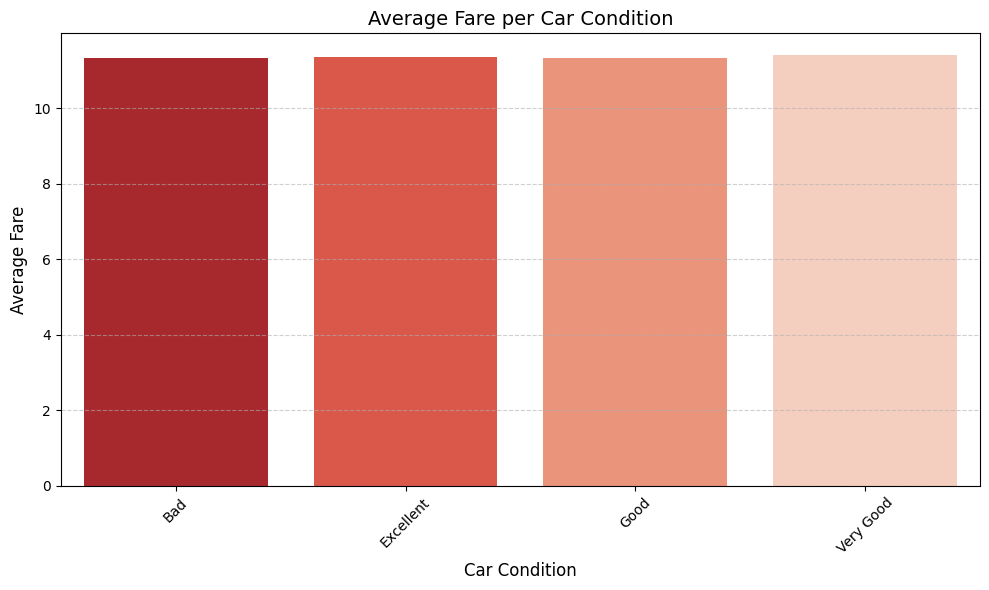

In [ ]:
weather_fare = df.groupby('Car Condition')['fare_amount'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_fare.index, y=weather_fare.values, palette="Reds_r")

# Add labels and formatting
plt.title("Average Fare per Car Condition", fontsize=14)
plt.xlabel("Car Condition", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Fare according to the traffic conditions 

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/2273985944.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_fare.index, y=weather_fare.values, palette="Reds_r")


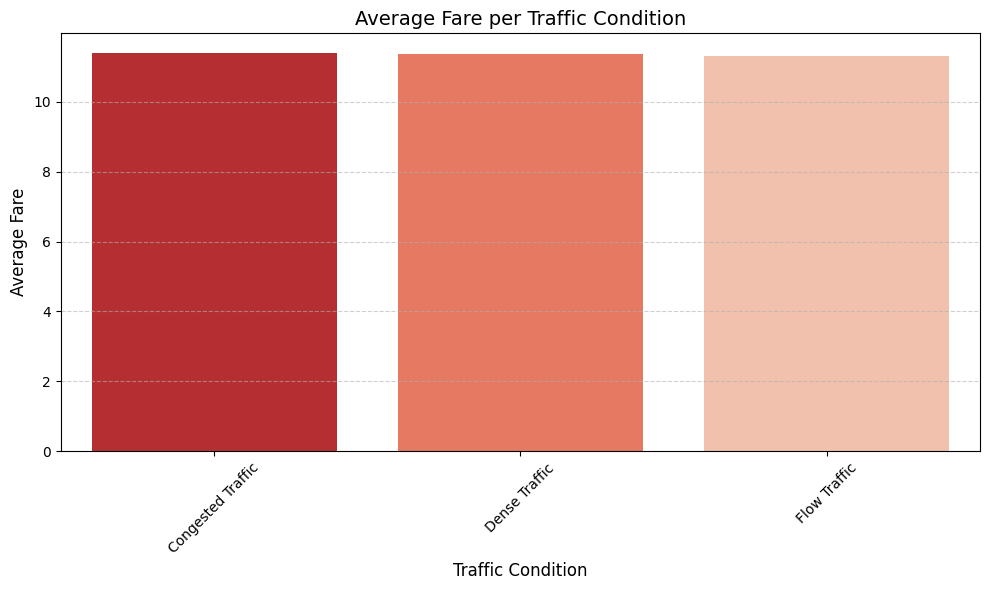

In [ ]:
weather_fare = df.groupby('Traffic Condition')['fare_amount'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_fare.index, y=weather_fare.values, palette="Reds_r")

# Add labels and formatting
plt.title("Average Fare per Traffic Condition", fontsize=14)
plt.xlabel("Traffic Condition", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Rush hours

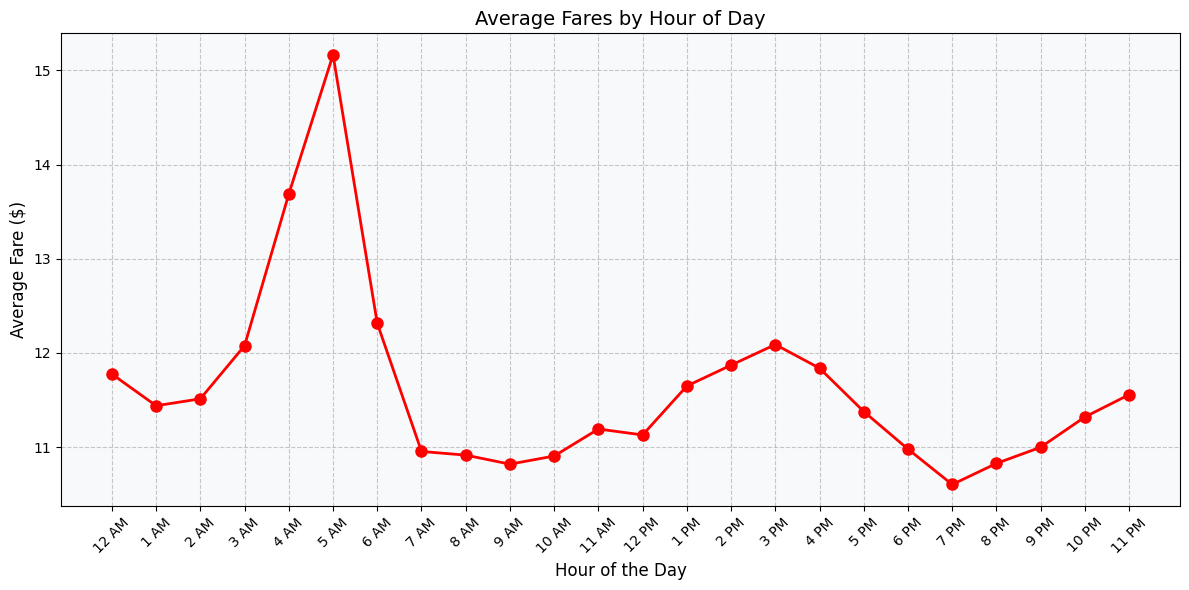

In [ ]:


hourly_fares = df.groupby('hour')['fare_amount'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_fares.index, hourly_fares.values, 'r-', marker='o', linewidth=2, markersize=8)

hour_labels = []
for i in range(24):
    if i == 0:
        hour_labels.append('12 AM')
    elif i < 12:
        hour_labels.append(f'{i} AM')
    elif i == 12:
        hour_labels.append('12 PM')
    else:
        hour_labels.append(f'{i-12} PM')

plt.title('Average Fares by Hour of Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(24), hour_labels, rotation=45)

plt.gca().set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

Average fare by month 

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/923755634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_fare.index, y=weather_fare.values, palette="Blues_r")


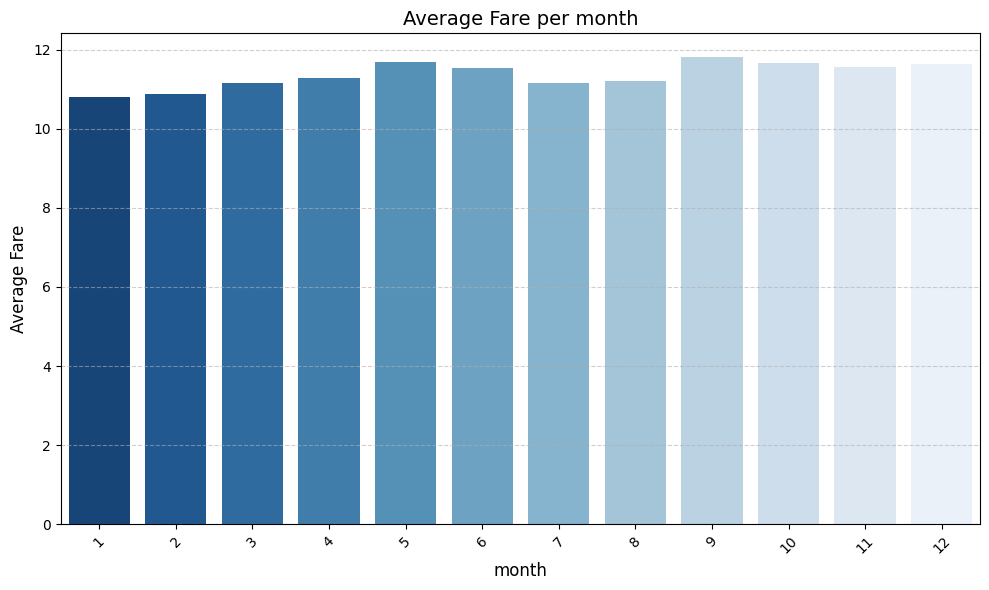

In [ ]:
weather_fare = df.groupby('month')['fare_amount'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_fare.index, y=weather_fare.values, palette="Blues_r")

# Add labels and formatting
plt.title("Average Fare per month", fontsize=14)
plt.xlabel("month", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Average fare per day of week 

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/1408444054.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_fare.index, y=weather_fare.values, palette="Reds_r")


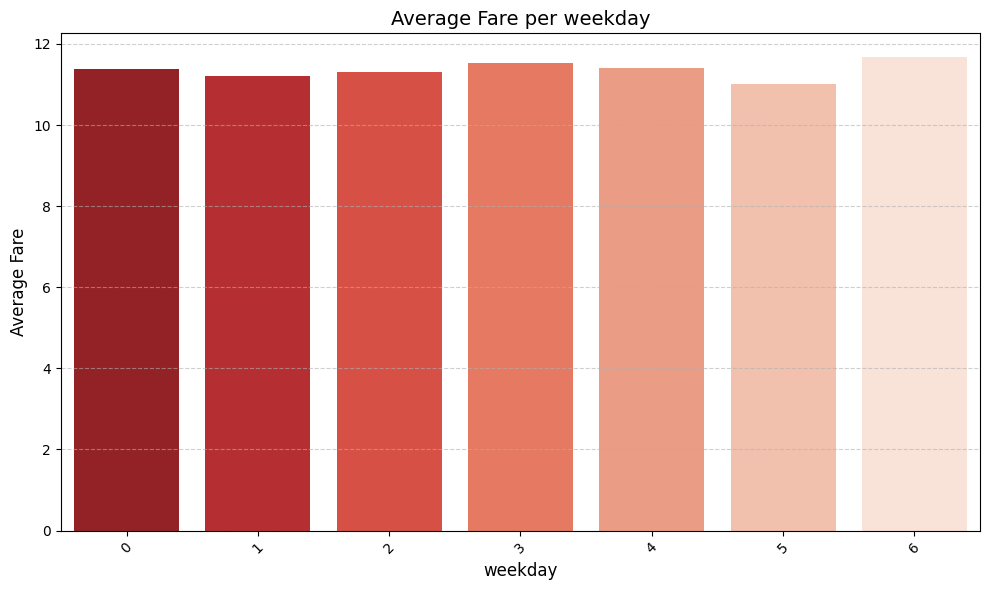

In [ ]:
weather_fare = df.groupby('weekday')['fare_amount'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_fare.index, y=weather_fare.values, palette="Reds_r")

# Add labels and formatting
plt.title("Average Fare per weekday", fontsize=14)
plt.xlabel("weekday", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

average fare per distance

passenger count  by Hour of Day

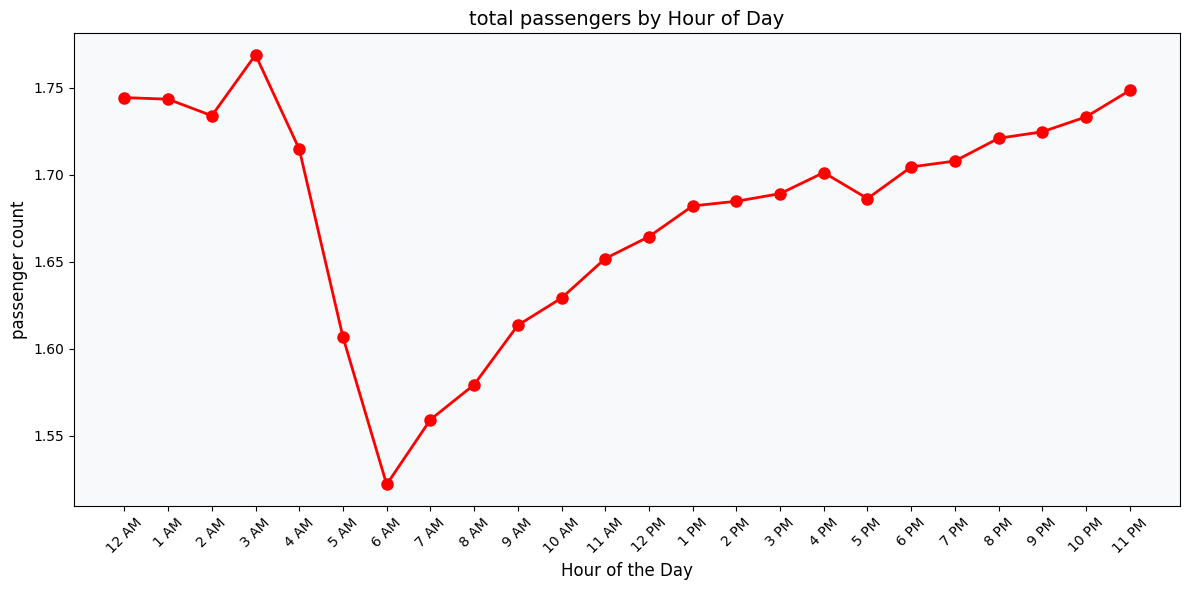

In [ ]:
hourly_passengers = df.groupby('hour')['passenger_count'].mean()
plt.figure(figsize=(12, 6))
plt.plot(hourly_passengers.index, hourly_passengers.values, 'r-', marker='o', linewidth=2, markersize=8)

hour_labels = []
for i in range(24):
    if i == 0:
        hour_labels.append('12 AM')
    elif i < 12:
        hour_labels.append(f'{i} AM')
    elif i == 12:
        hour_labels.append('12 PM')
    else:
        hour_labels.append(f'{i-12} PM')

plt.title('total passengers by Hour of Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('passenger count', fontsize=12)

plt.xticks(range(24), hour_labels, rotation=45)

plt.gca().set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

passengers count per month 

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/2745891479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_passenger_totals.index, y=monthly_passenger_totals.values, palette="Reds_r")


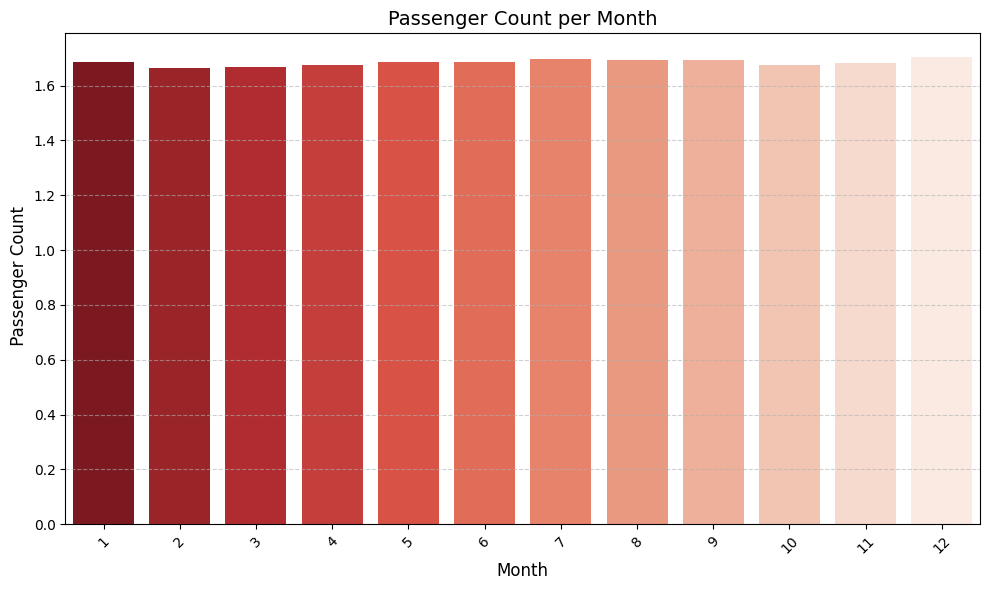

In [ ]:
monthly_passenger_totals = df.groupby('month')['passenger_count'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_passenger_totals.index, y=monthly_passenger_totals.values, palette="Reds_r")

# Add labels and formatting
plt.title("Passenger Count per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel(" Passenger Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Total passengers according to day of week 

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/3703237750.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_passenger_totals.index, y=weekday_passenger_totals.values, palette="Greens_r")


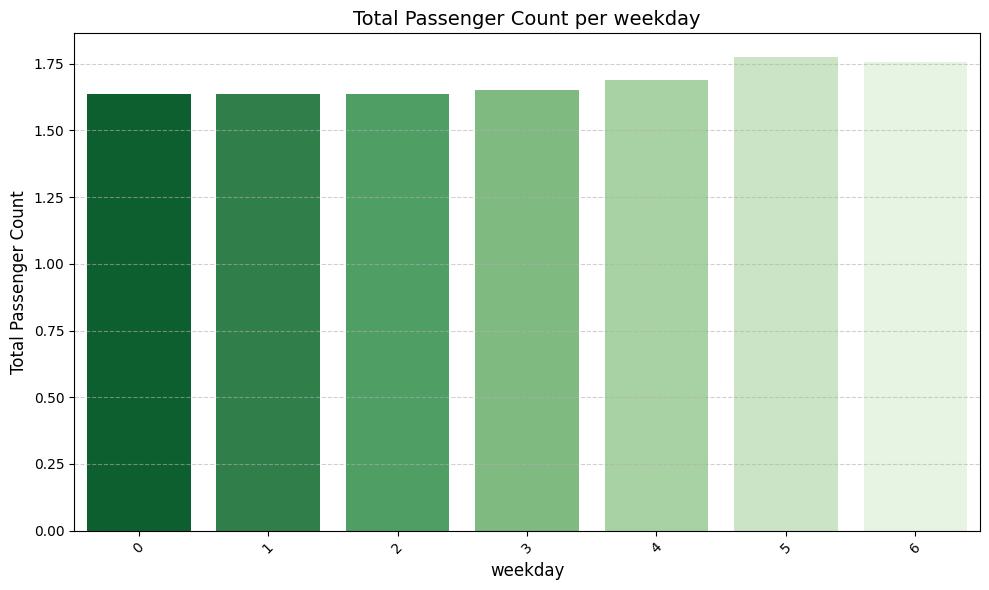

In [ ]:
weekday_passenger_totals = df.groupby('weekday')['passenger_count'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_passenger_totals.index, y=weekday_passenger_totals.values, palette="Greens_r")

# Add labels and formatting
plt.title("Total Passenger Count per weekday", fontsize=14)
plt.xlabel("weekday", fontsize=12)
plt.ylabel("Total Passenger Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


user loyality

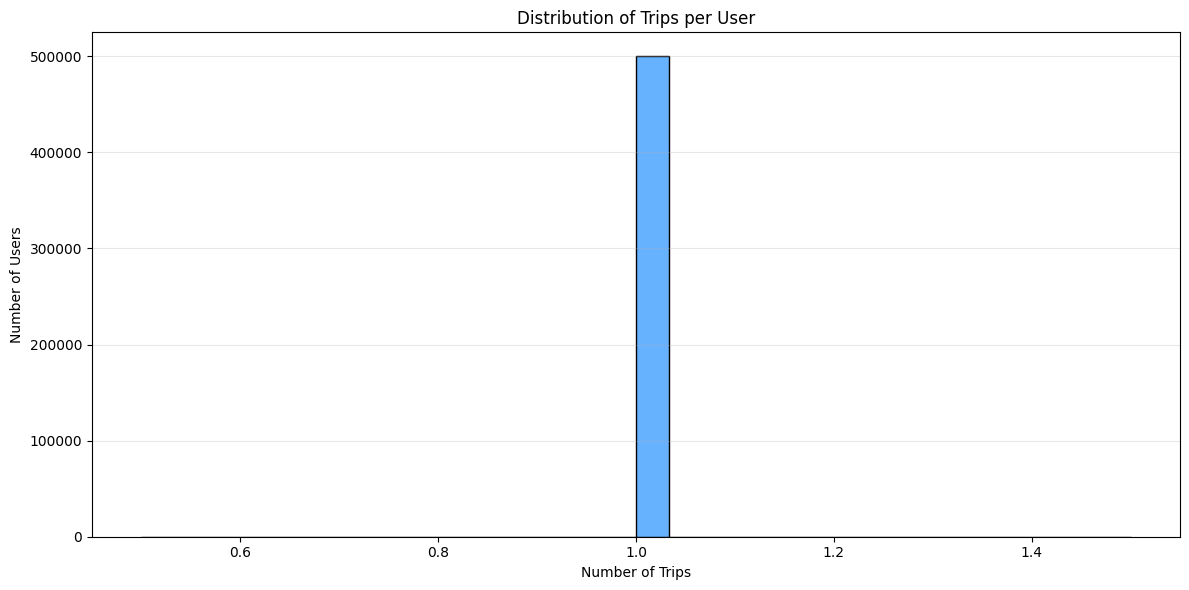

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/1098608613.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='User Count', data=user_segments,


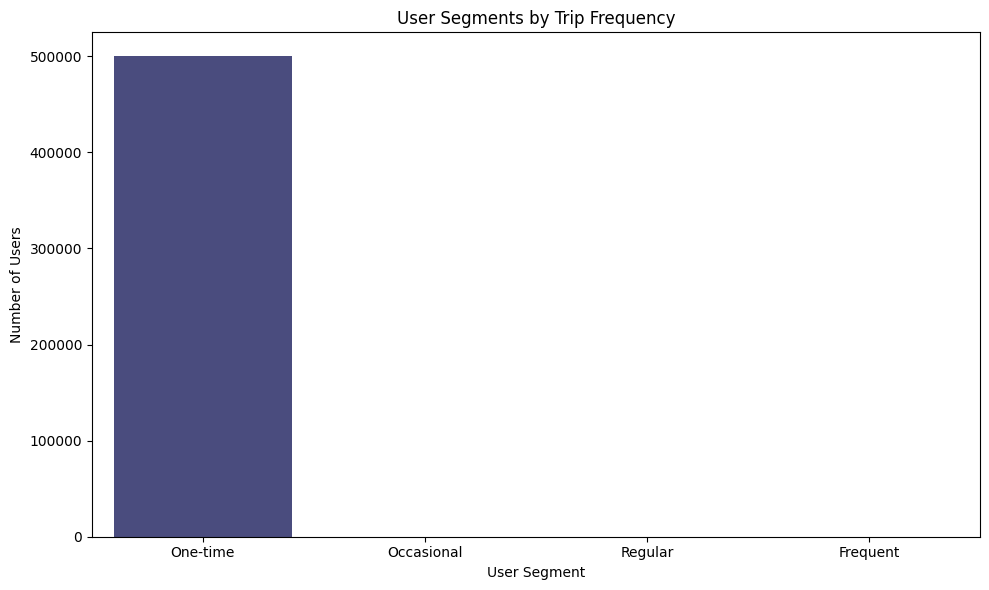

In [ ]:

user_frequency = df['User ID'].value_counts().reset_index()
user_frequency.columns = ['User ID', 'trip_count']

top_users = user_frequency.head(10)



plt.figure(figsize=(12, 6))
plt.hist(user_frequency['trip_count'], bins=30, color='#66B2FF', edgecolor='black')
plt.title('Distribution of Trips per User')
plt.xlabel('Number of Trips')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


def categorize_user(count):
    if count == 1:
        return 'One-time'
    elif count <= 5:
        return 'Occasional'
    elif count <= 20:
        return 'Regular'
    else:
        return 'Frequent'

user_frequency['user_segment'] = user_frequency['trip_count'].apply(categorize_user)
user_segments = user_frequency['user_segment'].value_counts().reset_index()
user_segments.columns = ['Segment', 'User Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='User Count', data=user_segments, 
            order=['One-time', 'Occasional', 'Regular', 'Frequent'],
            palette='viridis')
plt.title('User Segments by Trip Frequency')
plt.xlabel('User Segment')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

Top drivers by earnings 

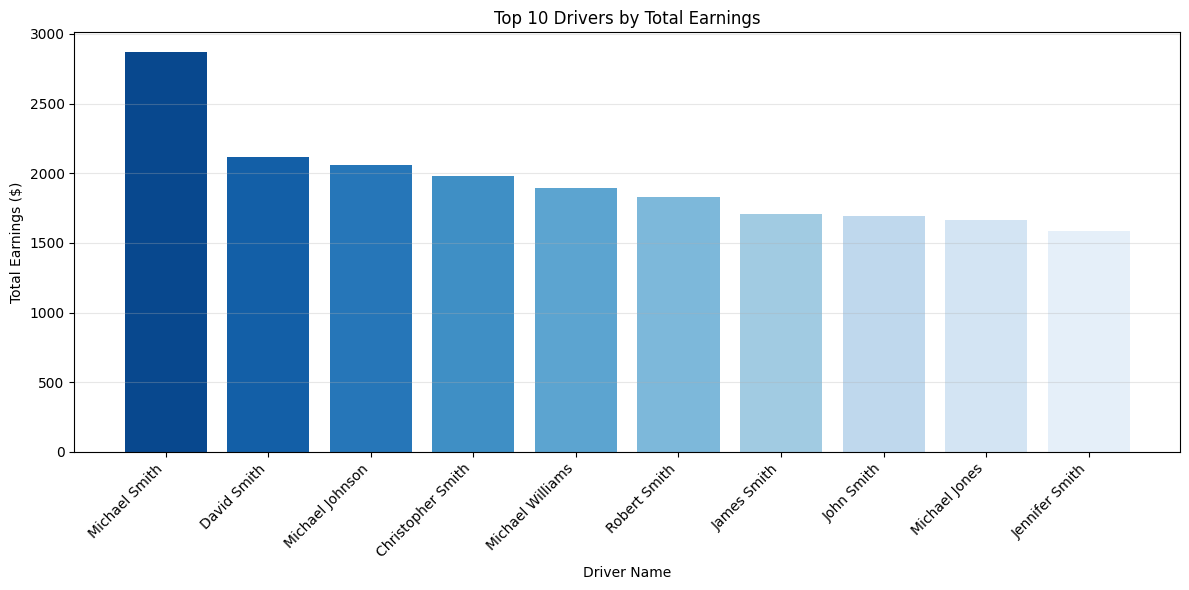

In [ ]:
driver_trips = df.groupby('Driver Name')['key'].count()
driver_earnings = df.groupby('Driver Name')['fare_amount'].sum()
driver_earnings_per_trip = driver_earnings / driver_trips
top_drivers = driver_earnings.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_drivers.index, top_drivers.values, color=sns.color_palette('Blues_r', 10))
plt.title('Top 10 Drivers by Total Earnings')
plt.xlabel('Driver Name')
plt.ylabel('Total Earnings ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

top drivers according to number of trips 

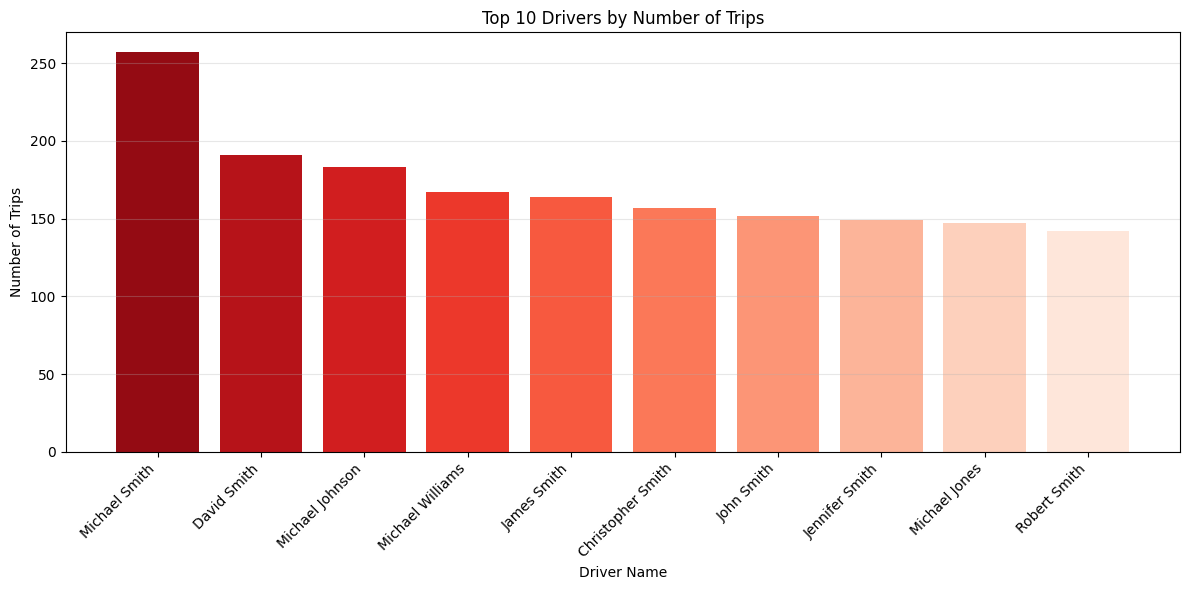

In [ ]:
driver_trips = df.groupby('Driver Name')['key'].count()

top_drivers_by_trips = driver_trips.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_drivers_by_trips.index, top_drivers_by_trips.values, color=sns.color_palette('Reds_r', 10))
plt.title('Top 10 Drivers by Number of Trips')
plt.xlabel('Driver Name')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

weather impact on distance

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/1855423781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_distance.index, y=weather_distance.values, palette='Set3')


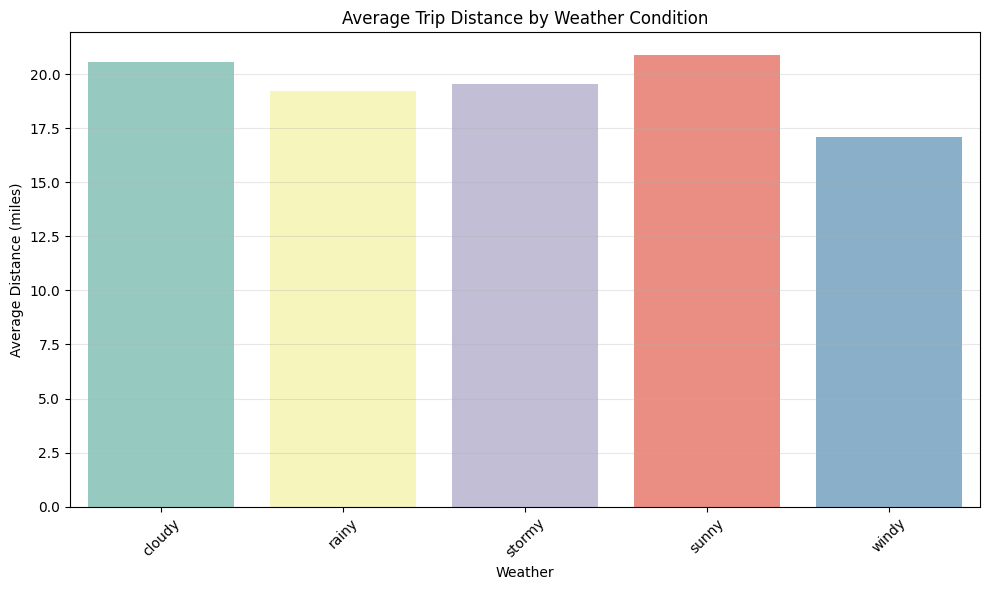

In [ ]:

weather_distance = df.groupby('Weather')['distance'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_distance.index, y=weather_distance.values, palette='Set3')
plt.title('Average Trip Distance by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Average Distance (miles)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

traffic according to time of day

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/3892062520.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  traffic_counts = df.groupby(['time_period', 'Traffic Condition']).size().unstack()


<Figure size 1000x600 with 0 Axes>

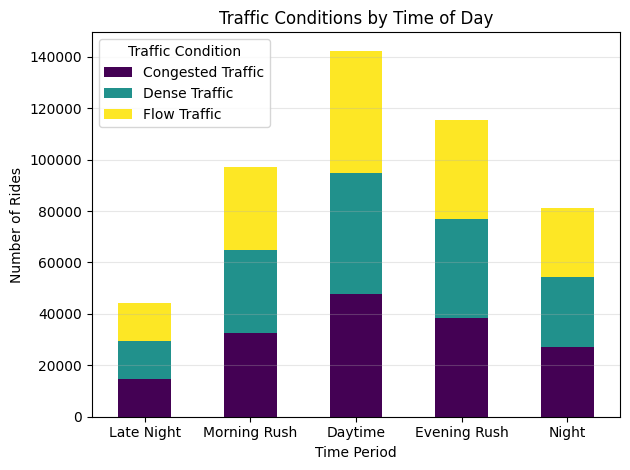

In [ ]:


hour = pd.to_datetime(df['pickup_datetime']).dt.hour
df['time_period'] = pd.cut(hour, bins=[0, 5, 10, 16, 20, 24], 
                          labels=['Late Night', 'Morning Rush', 'Daytime', 'Evening Rush', 'Night'])

traffic_counts = df.groupby(['time_period', 'Traffic Condition']).size().unstack()

plt.figure(figsize=(10, 6))
traffic_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Traffic Conditions by Time of Day')
plt.xlabel('Time Period')
plt.ylabel('Number of Rides')
plt.legend(title='Traffic Condition')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

car condition according to distance 

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/1365461303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car Condition', y='Average Distance', data=car_distance, palette='Set2')


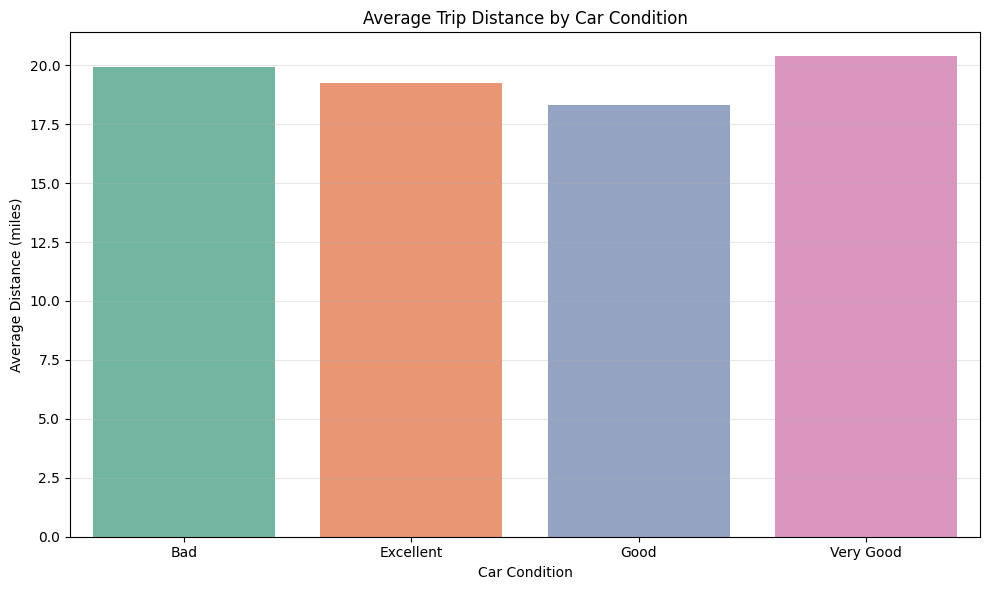

In [ ]:

car_distance = df.groupby('Car Condition')['distance'].mean().reset_index()
car_distance.columns = ['Car Condition', 'Average Distance']

plt.figure(figsize=(10, 6))
sns.barplot(x='Car Condition', y='Average Distance', data=car_distance, palette='Set2')


plt.title('Average Trip Distance by Car Condition')
plt.xlabel('Car Condition')
plt.ylabel('Average Distance (miles)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

regular trip vs airport trip

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/1000062336.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_fares['airport_trip'], y=airport_fares['fare_amount'], palette=['skyblue', 'navy'])


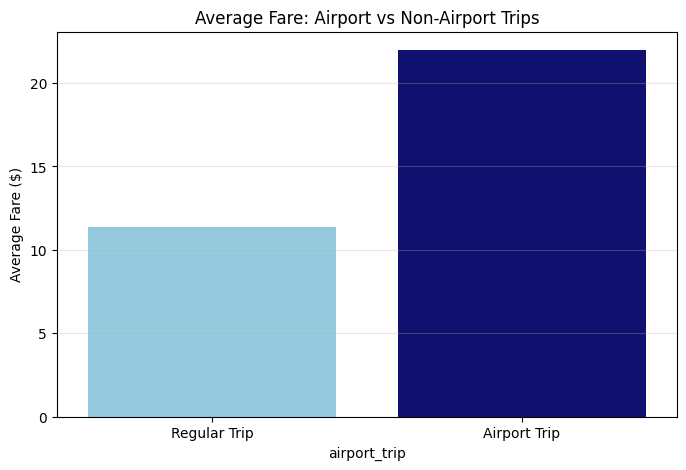

In [ ]:

# Define airport trips (trips that end near airports)
df['airport_trip'] = (df['jfk_dist'] < 3) | (df['lga_dist'] < 3) | (df['ewr_dist'] < 3)


airport_fares = df.groupby('airport_trip')['fare_amount'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=airport_fares['airport_trip'], y=airport_fares['fare_amount'], palette=['skyblue', 'navy'])
plt.title('Average Fare: Airport vs Non-Airport Trips')
plt.xticks([0, 1], ['Regular Trip', 'Airport Trip'])
plt.ylabel('Average Fare ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()


Number of trips to each airport

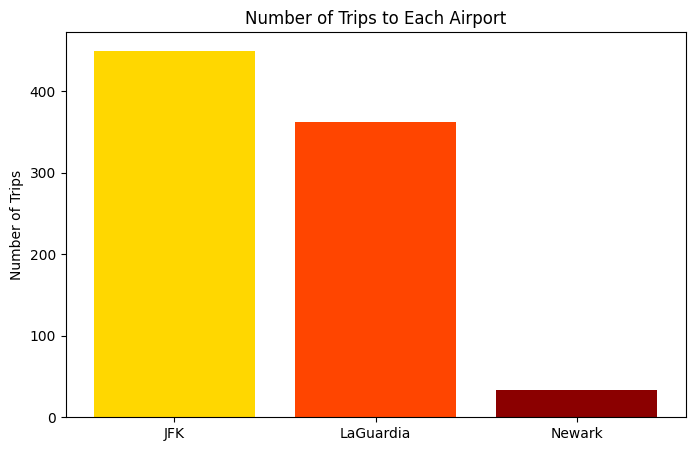

In [ ]:

airport_counts = [
    df[df['jfk_dist'] < 3].shape[0],
    df[df['lga_dist'] < 3].shape[0], 
    df[df['ewr_dist'] < 3].shape[0]
]

plt.figure(figsize=(8, 5))
plt.bar(['JFK', 'LaGuardia', 'Newark'], airport_counts, color=['gold', 'orangered', 'darkred'])
plt.title('Number of Trips to Each Airport')
plt.ylabel('Number of Trips')
plt.show()

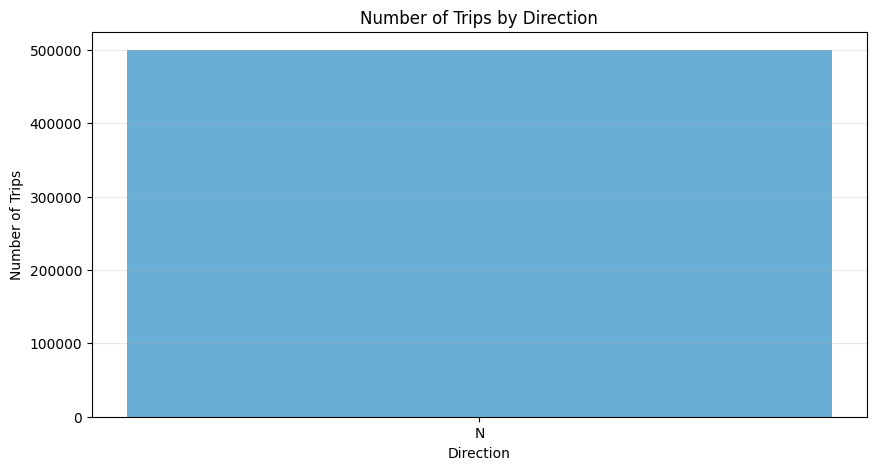

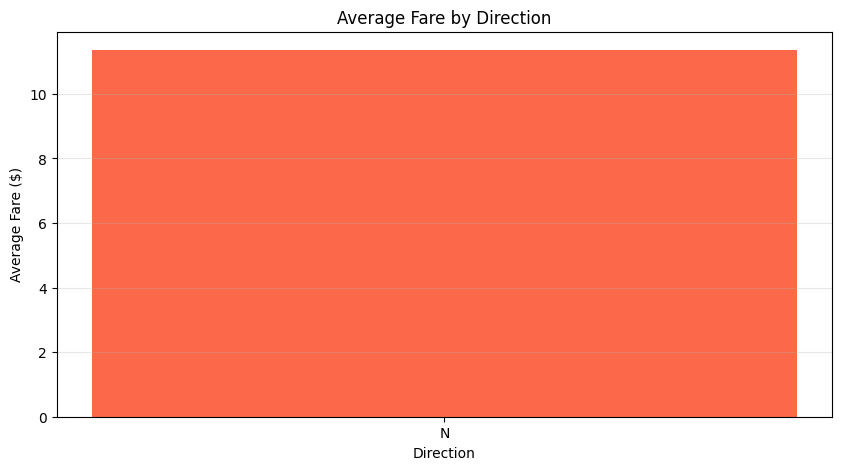

In [ ]:


def get_direction(bearing):
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    index = round(bearing / 45) % 8
    return directions[index]

df['direction'] = df['bearing'].apply(get_direction)


direction_counts = df['direction'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(direction_counts.index, direction_counts.values, color=sns.color_palette('Blues', len(direction_counts)))
plt.title('Number of Trips by Direction')
plt.xlabel('Direction')
plt.ylabel('Number of Trips')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Average fare by direction
direction_fares = df.groupby('direction')['fare_amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(direction_fares.index, direction_fares.values, color=sns.color_palette('Reds', len(direction_fares)))
plt.title('Average Fare by Direction')
plt.xlabel('Direction')
plt.ylabel('Average Fare ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()

Average fare according to distance to newyork city center

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/3662188888.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nyc_fares = df.groupby('nyc_distance_category')['fare_amount'].mean().reset_index()
/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_1848/3662188888.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nyc_distance_category', y='fare_amount', data=nyc_fares, palette='Greens_r')


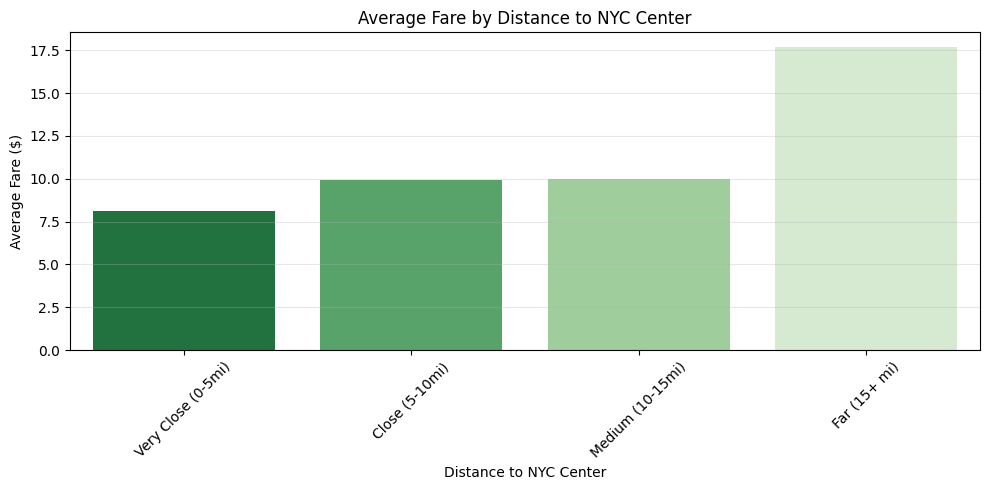

In [ ]:

df['nyc_distance_category'] = pd.cut(
    df['nyc_dist'], 
    bins=[0, 5, 10, 15, 100], 
    labels=['Very Close (0-5mi)', 'Close (5-10mi)', 'Medium (10-15mi)', 'Far (15+ mi)']
)

nyc_fares = df.groupby('nyc_distance_category')['fare_amount'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='nyc_distance_category', y='fare_amount', data=nyc_fares, palette='Greens_r')
plt.title('Average Fare by Distance to NYC Center')
plt.xlabel('Distance to NYC Center')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Columns to drop
cols_to_drop = ["User ID", "User Name", "Driver Name", "key", "pickup_datetime"]

df = df.drop(columns=cols_to_drop, errors="ignore")

print("Dropped unnecessary columns. New shape:", df.shape)


Dropped unnecessary columns. New shape: (499995, 25)


remove outliers 


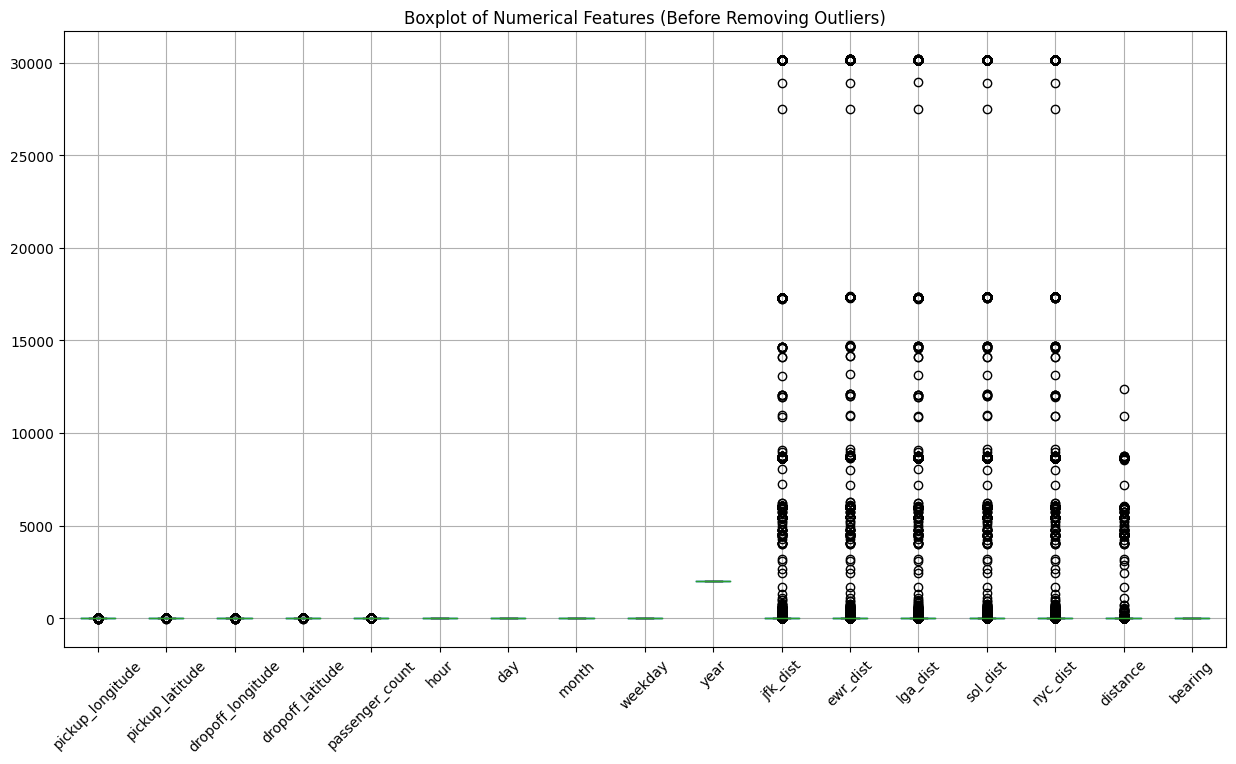

In [ ]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
num_cols.remove("fare_amount") 

# Plot boxplots before removing outliers
plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features (Before Removing Outliers)")
plt.show()

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
df_cleaned = remove_outliers(df, num_cols)

print("Outliers removed. New dataset shape:", df_cleaned.shape)

Outliers removed. New dataset shape: (346581, 25)


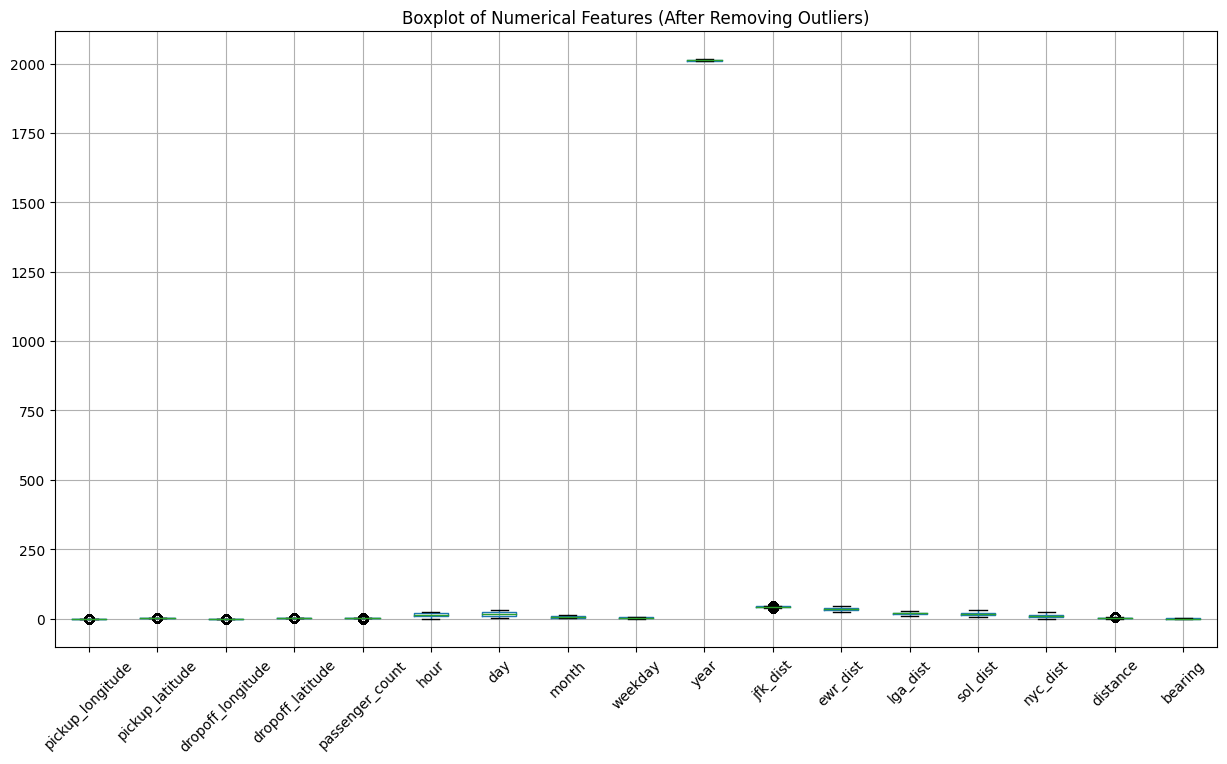

In [ ]:
# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
df_cleaned[num_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features (After Removing Outliers)")
plt.show()


encode the data

In [ ]:
cat_cols = df_cleaned.select_dtypes(include=["object", "category"]).columns

# Count unique values in each categorical column
cat_unique_counts = df_cleaned[cat_cols].nunique()

# Display unique counts
print(cat_unique_counts)


Car Condition            4
Weather                  5
Traffic Condition        3
time_period              5
direction                1
nyc_distance_category    4
dtype: int64


In [ ]:
# Define One-Hot and Label Encoding based on unique values
ohe_cols = [col for col in cat_cols if df_cleaned[col].nunique() <= 10]  # Low-cardinality
label_cols = [col for col in cat_cols if df_cleaned[col].nunique() > 10]  # High-cardinality

print("One-Hot Encoding Columns:", ohe_cols)
print("Label Encoding Columns:", label_cols)

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=ohe_cols, drop_first=True)

# Apply Label Encoding
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store encoders for future use


One-Hot Encoding Columns: ['Car Condition', 'Weather', 'Traffic Condition', 'time_period', 'direction', 'nyc_distance_category']
Label Encoding Columns: []


Handle missing values

In [ ]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":  # Categorical
        df_encoded[col].fillna(df_encoded[col].mode()[0], inplace=True)
    else:  # Numerical
        df_encoded[col].fillna(df_encoded[col].median(), inplace=True)
print(df_encoded.isnull().sum().sum(), "missing values remaining.")  # Should be 0


0 missing values remaining.


data stand

In [ ]:
X = df_encoded.drop(columns=["fare_amount"])  # Drop target column
y = df_encoded["fare_amount"]

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (277264, 34), Test size: (69317, 34)


Linear regression model

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_lr = linear_reg.predict(X_test)

testing

In [ ]:
print("\n🔹 Linear Regression Performance 🔹")
print("MAE:", mean_absolute_error(y_test, y_pred_lr)) 
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


🔹 Linear Regression Performance 🔹
MAE: 1.6122748316958344
MSE: 8.796199454930035
R² Score: 0.4813474362946084


In [59]:
import joblib

joblib.dump(linear_reg, "fare_prediction_model.pkl")
print("✅ Model saved!")

✅ Model saved!


SVM

In [55]:
# # Define parameter grid for SVM
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto']
# }

# svm_model = SVR()

# # Perform GridSearchCV
# grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# grid_search_svm.fit(X_train, y_train)

# # Best Parameters
# print("Best SVM Parameters:", grid_search_svm.best_params_)

# # Best Model
# best_svm = grid_search_svm.best_estimator_

# # Predict with Best Model
# y_pred_best_svm = best_svm.predict(X_test)
# print("Best SVM R² Score:", r2_score(y_test, y_pred_best_svm))
# print("Best SVM MSE:", mean_squared_error(y_test, y_pred_best_svm))


PCA

In [56]:
# PCA to reduce to 2D or 3D (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("✅ PCA: ", pca.explained_variance_ratio_)


✅ PCA:  [0.22699202 0.05937122]


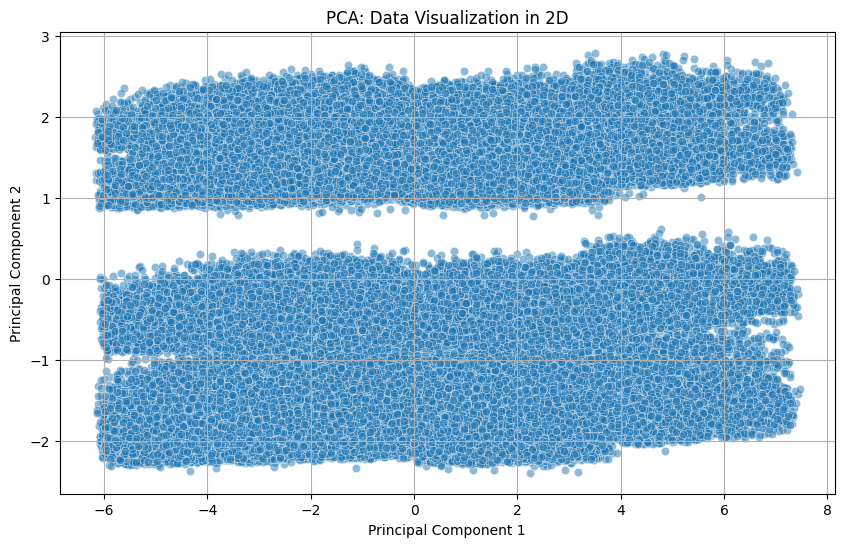

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.5)

# Labels and Title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Data Visualization in 2D")
plt.grid(True)
plt.show()

k-means 

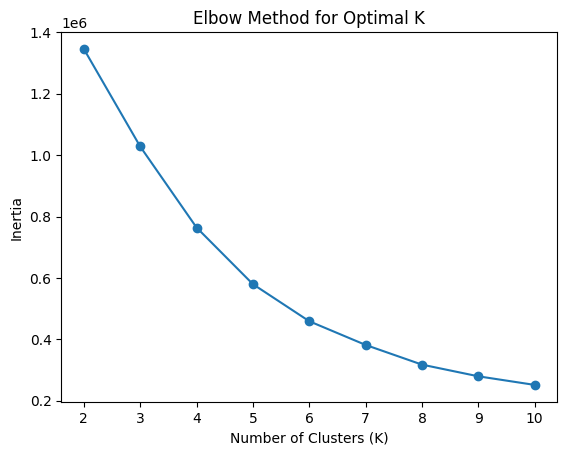

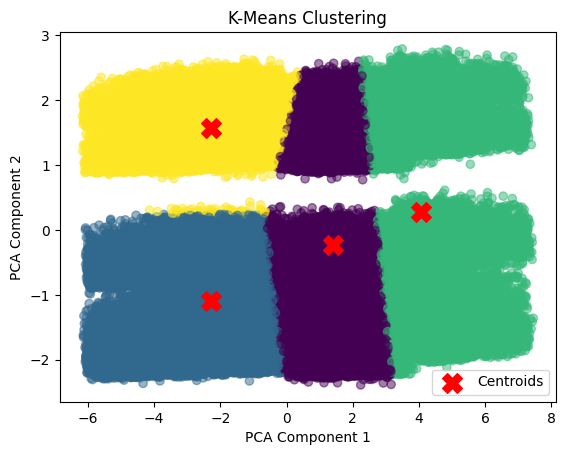

In [58]:
# Elbow Method to Find Best K
inertia = []
K_range = range(2, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply K-Means with best K (let’s assume K=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca)

# Visualize Clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap="viridis", alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()
